In [2]:
# pip install git+https://github.com/thinh-vu/vnstock.git@main

In [3]:
from vnstock import *

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Measuring single year's operating performance
"We continue to feel that the **ratio of operating earnings** (before securities gains or losses) to shareholders’ equity 
with all **securities valued at cost** is the most appropriate way to measure any single year’s operating performance."  

-- Berkshire Letters 1979

In [5]:
IncomeStatement = financial_flow(symbol='VCS', report_type='incomestatement', report_range='yearly')
IncomeStatement = IncomeStatement.sort_index()
IncomeStatement.head(10)

,ticker,revenue,yearRevenueGrowth,quarterRevenueGrowth,costOfGoodSold,grossProfit,operationExpense,operationProfit,yearOperationProfitGrowth,quarterOperationProfitGrowth,...,postTaxProfit,shareHolderIncome,yearShareHolderIncomeGrowth,quarterShareHolderIncomeGrowth,investProfit,serviceProfit,otherProfit,provisionExpense,operationIncome,ebitda
index,,,,,,,,,,,,,,,,,,,,,
2005,VCS,0,NaN,None,0,0,0,0,NaN,None,...,0,0,NaN,None,None,None,None,None,None,NaN
2006,VCS,200,NaN,None,-153,47,-14,33,NaN,None,...,6,6,NaN,None,None,None,None,None,None,NaN
2007,VCS,260,0.302,None,-185,75,-17,59,0.780,None,...,41,41,6.318,None,None,None,None,None,None,NaN
2008,VCS,371,0.426,None,-256,115,-26,89,0.515,None,...,75,75,0.818,None,None,None,None,None,None,132.0
2009,VCS,521,0.405,None,-375,146,-39,108,0.213,None,...,94,94,0.252,None,None,None,None,None,None,157.0
2010,VCS,811,0.555,None,-649,161,-52,109,0.013,None,...,114,111,0.190,None,None,None,None,None,None,165.0
2011,VCS,890,0.097,None,-599,291,-91,200,0.834,None,...,123,122,0.091,None,None,None,None,None,None,276.0
2012,VCS,965,0.084,None,-639,326,-129,197,-0.017,None,...,56,55,-0.551,None,None,None,None,None,None,344.0
2013,VCS,1311,0.359,None,-915,396,-153,243,0.233,None,...,68,72,0.311,None,None,None,None,None,None,376.0


In [6]:
print(list(IncomeStatement.columns.values))

['ticker', 'revenue', 'yearRevenueGrowth', 'quarterRevenueGrowth', 'costOfGoodSold', 'grossProfit', 'operationExpense', 'operationProfit', 'yearOperationProfitGrowth', 'quarterOperationProfitGrowth', 'interestExpense', 'preTaxProfit', 'postTaxProfit', 'shareHolderIncome', 'yearShareHolderIncomeGrowth', 'quarterShareHolderIncomeGrowth', 'investProfit', 'serviceProfit', 'otherProfit', 'provisionExpense', 'operationIncome', 'ebitda']


In [7]:
x_axis = IncomeStatement.index.sort_values()
x_axis

Index(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object', name='index')

In [8]:
BalanceSheet = financial_flow(symbol='VCS', report_type='balancesheet', report_range='yearly')
BalanceSheet = BalanceSheet.sort_index()
BalanceSheet['equityGrowth'] = BalanceSheet['equity'].pct_change() * 100
BalanceSheet[['equity', 'equityGrowth']]

,equity,equityGrowth
index,,
2006,35,NaN
2007,183,422.857143
2008,300,63.934426
2009,381,27.000000
2010,702,84.251969
2011,1042,48.433048
2012,1000,-4.030710
2013,1062,6.200000
2014,786,-25.988701


In [9]:
print(list(BalanceSheet.columns.values))

['ticker', 'shortAsset', 'cash', 'shortInvest', 'shortReceivable', 'inventory', 'longAsset', 'fixedAsset', 'asset', 'debt', 'shortDebt', 'longDebt', 'equity', 'capital', 'centralBankDeposit', 'otherBankDeposit', 'otherBankLoan', 'stockInvest', 'customerLoan', 'badLoan', 'provision', 'netCustomerLoan', 'otherAsset', 'otherBankCredit', 'oweOtherBank', 'oweCentralBank', 'valuablePaper', 'payableInterest', 'receivableInterest', 'deposit', 'otherDebt', 'fund', 'unDistributedIncome', 'minorShareHolderProfit', 'payable', 'equityGrowth']


In [10]:
CashFlow = financial_flow(symbol='VCS', report_type='cashflow', report_range='yearly')
CashFlow = CashFlow.sort_index()
CashFlow['freeCashFlowRate'] = CashFlow['freeCashFlow'].pct_change() * 100
CashFlow.head(5)

,ticker,investCost,fromInvest,fromFinancial,fromSale,freeCashFlow,freeCashFlowRate
index,,,,,,,
2008,VCS,-32,-21,26,60,NaN,NaN
2009,VCS,-75,-190,304,73,136.0,NaN
2010,VCS,-351,-369,390,-251,136.0,0.000000
2011,VCS,-436,-452,606,-164,112.0,-17.647059
2012,VCS,-22,-12,-163,176,58.0,-48.214286


### The Big 4 Numbers that you'd like to see grow each year at least 10%
<ul>
    <li>Net Income or Operating Earnings</li>
    <li>Equity & Dividends</li>
    <li>Sales</li>
    <li>Operating Cash</li>
</ul>


C:\Users\quang\AppData\Local\Temp\ipykernel_9968\46710130.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(),rotation=45)
C:\Users\quang\AppData\Local\Temp\ipykernel_9968\46710130.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(),rotation=45)
C:\Users\quang\AppData\Local\Temp\ipykernel_9968\46710130.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(),rotation=45)
C:\Users\quang\AppData\Local\Temp\ipykernel_9968\46710130.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(),rotation=45)


[Text(0, 0, '2008'),
 Text(1, 0, '2009'),
 Text(2, 0, '2010'),
 Text(3, 0, '2011'),
 Text(4, 0, '2012'),
 Text(5, 0, '2013'),
 Text(6, 0, '2014'),
 Text(7, 0, '2015'),
 Text(8, 0, '2016'),
 Text(9, 0, '2017'),
 Text(10, 0, '2018'),
 Text(11, 0, '2019'),
 Text(12, 0, '2020'),
 Text(13, 0, '2021'),
 Text(14, 0, '2022')]

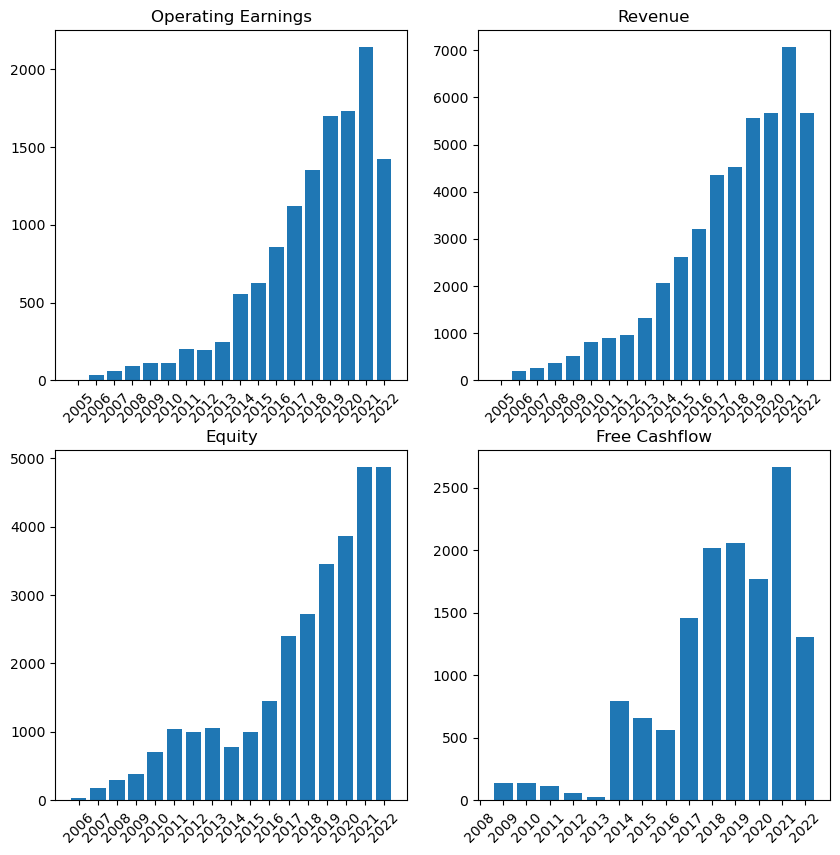

In [11]:
fig, (axs) = plt.subplots(2,2, figsize=(10,10))

axs[0,0].bar(x=x_axis, height='operationProfit', data=IncomeStatement)
axs[0,0].set_title('Operating Earnings')
axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(),rotation=45)
axs[0,1].set_title('Revenue')
axs[0,1].bar(x=x_axis, height='revenue', data=IncomeStatement)
axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(),rotation=45)
axs[1,0].bar(x=BalanceSheet.index, height=BalanceSheet['equity'])
axs[1,0].set_title('Equity')
axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(),rotation=45)
axs[1,1].bar(x=CashFlow.index, height=CashFlow['freeCashFlow'])
axs[1,1].set_title('Free Cashflow')
axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(),rotation=45)

C:\Users\quang\AppData\Local\Temp\ipykernel_9968\1788130775.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(),rotation=45)
C:\Users\quang\AppData\Local\Temp\ipykernel_9968\1788130775.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(),rotation=45)
C:\Users\quang\AppData\Local\Temp\ipykernel_9968\1788130775.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(),rotation=45)
C:\Users\quang\AppData\Local\Temp\ipykernel_9968\1788130775.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(),rotation=45)


[Text(0, 0, '2008'),
 Text(1, 0, '2009'),
 Text(2, 0, '2010'),
 Text(3, 0, '2011'),
 Text(4, 0, '2012'),
 Text(5, 0, '2013'),
 Text(6, 0, '2014'),
 Text(7, 0, '2015'),
 Text(8, 0, '2016'),
 Text(9, 0, '2017'),
 Text(10, 0, '2018'),
 Text(11, 0, '2019'),
 Text(12, 0, '2020'),
 Text(13, 0, '2021'),
 Text(14, 0, '2022')]

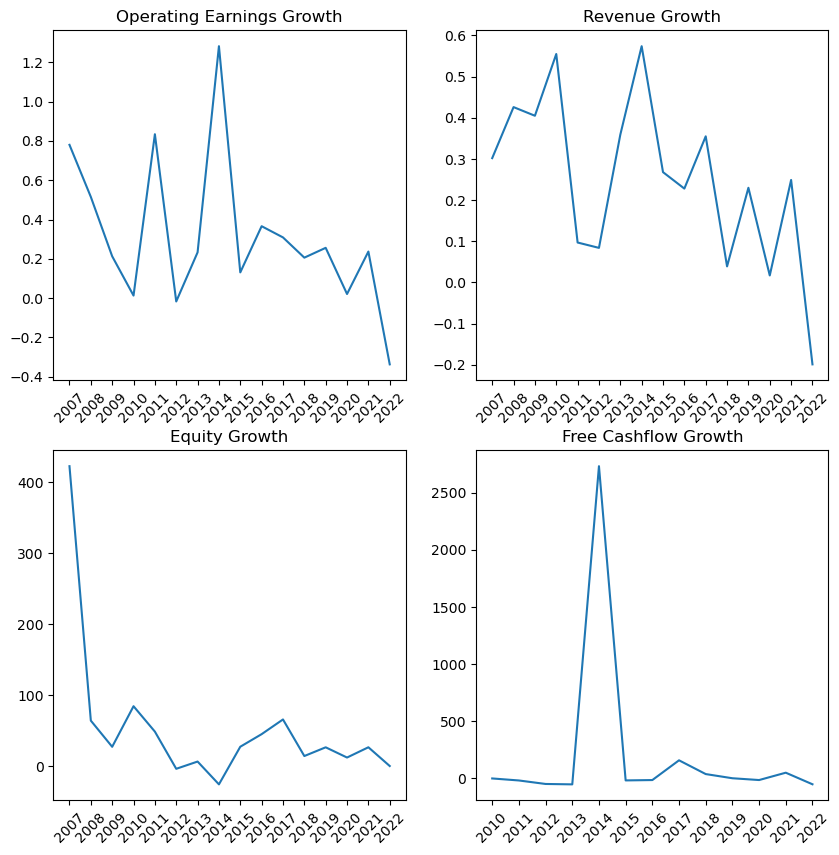

In [12]:
#The growth rate of the four numbers
fig, (axs) = plt.subplots(2,2, figsize=(10,10))

axs[0,0].plot(x_axis, 'yearOperationProfitGrowth', data=IncomeStatement)
axs[0,0].set_title('Operating Earnings Growth')
axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(),rotation=45)
axs[0,1].set_title('Revenue Growth')
axs[0,1].plot(x_axis, 'yearRevenueGrowth', data=IncomeStatement)
axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(),rotation=45)
axs[1,0].plot(BalanceSheet.index, BalanceSheet['equityGrowth'])
axs[1,0].set_title('Equity Growth')
axs[1,0].set_xticklabels(axs[1,0].get_xticklabels(),rotation=45)
axs[1,1].plot(CashFlow.index, CashFlow['freeCashFlowRate'])
axs[1,1].set_title('Free Cashflow Growth')
axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(),rotation=45)

Calculate the CAGR of the 4 numbers

In [26]:
#Merge multiple origin tables
full_df = pd.merge(IncomeStatement,BalanceSheet,left_index=True,right_index=True,how='left')
full_df = pd.merge(full_df,CashFlow,left_index=True,right_index=True,how='left')

#List of financial metrics to calculate the CAGR
metrics = ['operationProfit','equity','revenue','freeCashFlow']

#Calculate the CAGR for each metrics
CAGRS = {}

for metric in metrics:
    #Find the first and last non-null values:
    first_non_null = full_df[metric].first_valid_index()
    last_non_null = full_df[metric].last_valid_index()

    if first_non_null is not None and last_non_null is not None:
        #Calculate the number of years in which the value is not null
        num_years = int(last_non_null) - int(first_non_null) + 1
        initial_value = full_df[metric][first_non_null]
        lastest_value = full_df[metric][last_non_null]
        
        
        CAGR = (((lastest_value/initial_value) ** (1/num_years)) - 1) * 100

        CAGRS[metric] = CAGR

#Print CAGR for each metric
for metric, cagr in CAGRS.items():
    print(f'CAGR of {metric}: {cagr: .2f}% over {num_years} years.')


# for metric in metrics:
#     initial_value = full_df[metric].dropna().loc[full_df[metric] > 0].iloc[0] #Find the first non null value
#     lastest_value = full_df[metric].iloc[-1]

#     lastest_year = int(full_df[metric].last_valid_index())
#     first_year = int(full_df[metric].first_valid_index())
#     print (f'{metric}: {first_year}, {lastest_year}')



CAGR of operationProfit:  inf% over 14 years.
CAGR of equity:  33.68% over 14 years.
CAGR of revenue:  inf% over 14 years.
CAGR of freeCashFlow:  17.56% over 14 years.


C:\Users\quang\AppData\Local\Temp\ipykernel_9968\2080589084.py:23: RuntimeWarning: divide by zero encountered in longlong_scalars
  CAGR = (((lastest_value/initial_value) ** (1/num_years)) - 1) * 100


In [14]:
df = pd.DataFrame({'metric': [0, np.nan, 3, 4, 5]})

initial_value = df['metric'].dropna().loc[df['metric'] > 0].iloc[0]

print(initial_value)


3.0


<Axes: xlabel='index', ylabel='yearOperationProfitGrowth'>

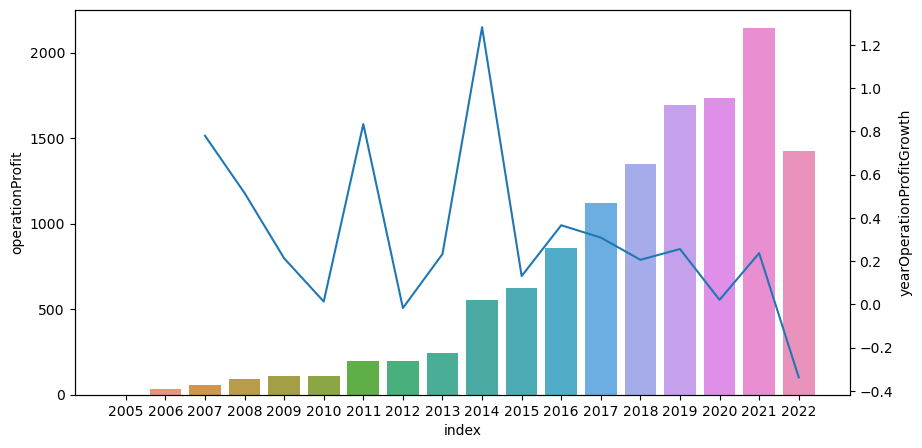

In [15]:
#Operating Earnings
fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx() # Secondary y-axis

sns.barplot(x=x_axis, y='operationProfit', data=IncomeStatement, ax=ax1) # On primary ax1
sns.lineplot(x=x_axis, y='yearOperationProfitGrowth', data=IncomeStatement, ax=ax2) # On primary ax2

# plt.figure(figsize=(35,15))
# plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '2005'),
  Text(1, 0, '2006'),
  Text(2, 0, '2007'),
  Text(3, 0, '2008'),
  Text(4, 0, '2009'),
  Text(5, 0, '2010'),
  Text(6, 0, '2011'),
  Text(7, 0, '2012'),
  Text(8, 0, '2013'),
  Text(9, 0, '2014'),
  Text(10, 0, '2015'),
  Text(11, 0, '2016'),
  Text(12, 0, '2017'),
  Text(13, 0, '2018'),
  Text(14, 0, '2019'),
  Text(15, 0, '2020'),
  Text(16, 0, '2021'),
  Text(17, 0, '2022')])

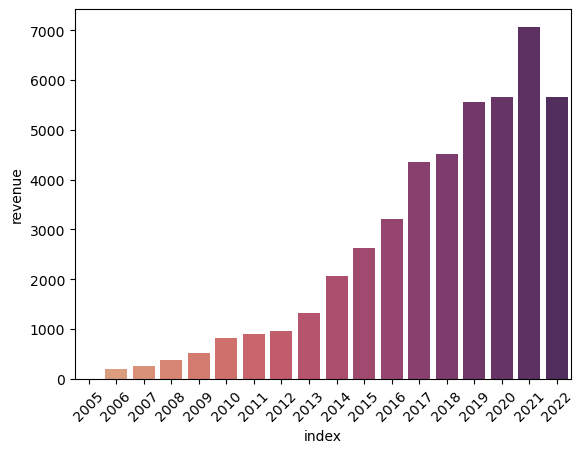

In [16]:
#Revenue
sns.barplot(x=IncomeStatement.index, y='revenue', data=IncomeStatement, palette='flare')
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '2006'),
  Text(1, 0, '2007'),
  Text(2, 0, '2008'),
  Text(3, 0, '2009'),
  Text(4, 0, '2010'),
  Text(5, 0, '2011'),
  Text(6, 0, '2012'),
  Text(7, 0, '2013'),
  Text(8, 0, '2014'),
  Text(9, 0, '2015'),
  Text(10, 0, '2016'),
  Text(11, 0, '2017'),
  Text(12, 0, '2018'),
  Text(13, 0, '2019'),
  Text(14, 0, '2020'),
  Text(15, 0, '2021'),
  Text(16, 0, '2022')])

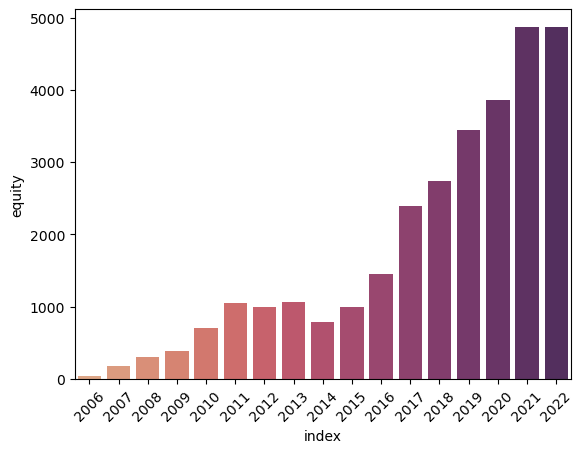

In [17]:
#Equity
# fig, ax1 = plt.subplots(figsize=(10,5))

sns.barplot(x=BalanceSheet.index, y='equity', data=BalanceSheet, palette='flare')
plt.xticks(rotation = 45)


In [18]:
DividendPaid = dividend_history('VCS')
DividendPaid.head(5)

,exerciseDate,cashYear,cashDividendPercentage,issueMethod
0,16/06/23,2023,0.2,cash
1,02/12/22,2022,0.3,cash
2,02/06/22,2022,0.3,cash
3,09/12/21,2021,0.2,cash
4,14/06/21,2021,0.2,cash


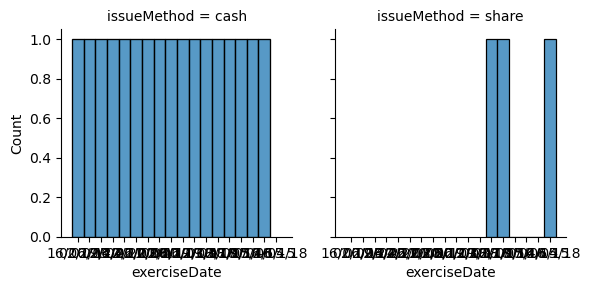

In [19]:
g = sns.FacetGrid(DividendPaid, col="issueMethod")
g.map(sns.histplot, "exerciseDate")

In [20]:
print(list(BalanceSheet.columns.values))

['ticker', 'shortAsset', 'cash', 'shortInvest', 'shortReceivable', 'inventory', 'longAsset', 'fixedAsset', 'asset', 'debt', 'shortDebt', 'longDebt', 'equity', 'capital', 'centralBankDeposit', 'otherBankDeposit', 'otherBankLoan', 'stockInvest', 'customerLoan', 'badLoan', 'provision', 'netCustomerLoan', 'otherAsset', 'otherBankCredit', 'oweOtherBank', 'oweCentralBank', 'valuablePaper', 'payableInterest', 'receivableInterest', 'deposit', 'otherDebt', 'fund', 'unDistributedIncome', 'minorShareHolderProfit', 'payable', 'equityGrowth']


In [21]:
IncomeStatement.head(5)

,ticker,revenue,yearRevenueGrowth,quarterRevenueGrowth,costOfGoodSold,grossProfit,operationExpense,operationProfit,yearOperationProfitGrowth,quarterOperationProfitGrowth,...,postTaxProfit,shareHolderIncome,yearShareHolderIncomeGrowth,quarterShareHolderIncomeGrowth,investProfit,serviceProfit,otherProfit,provisionExpense,operationIncome,ebitda
index,,,,,,,,,,,,,,,,,,,,,
2005,VCS,0,NaN,None,0,0,0,0,NaN,None,...,0,0,NaN,None,None,None,None,None,None,NaN
2006,VCS,200,NaN,None,-153,47,-14,33,NaN,None,...,6,6,NaN,None,None,None,None,None,None,NaN
2007,VCS,260,0.302,None,-185,75,-17,59,0.780,None,...,41,41,6.318,None,None,None,None,None,None,NaN
2008,VCS,371,0.426,None,-256,115,-26,89,0.515,None,...,75,75,0.818,None,None,None,None,None,None,132.0
2009,VCS,521,0.405,None,-375,146,-39,108,0.213,None,...,94,94,0.252,None,None,None,None,None,None,157.0


In [22]:
print(list(BalanceSheet.columns.values))

['ticker', 'shortAsset', 'cash', 'shortInvest', 'shortReceivable', 'inventory', 'longAsset', 'fixedAsset', 'asset', 'debt', 'shortDebt', 'longDebt', 'equity', 'capital', 'centralBankDeposit', 'otherBankDeposit', 'otherBankLoan', 'stockInvest', 'customerLoan', 'badLoan', 'provision', 'netCustomerLoan', 'otherAsset', 'otherBankCredit', 'oweOtherBank', 'oweCentralBank', 'valuablePaper', 'payableInterest', 'receivableInterest', 'deposit', 'otherDebt', 'fund', 'unDistributedIncome', 'minorShareHolderProfit', 'payable', 'equityGrowth']


# Long Term Results
"In measuring **long term** economic performance - in contrast to yearly performance - we believe it is appropriate to **recognize** fully any realized capital gains or losses as well as extraordinary items, and also to utilize financial statements presenting equity securities **at market value**.  Such capital gains or losses, either realized or unrealized, are fully as important to shareholders over a period of years as earnings realized in a more routine manner through operations; it is just that their impact is often extremely capricious in the short run, a characteristic that makes them inappropriate as an indicator of single year managerial performance."  (BVPS)

-- Berkshire Letters 1979